# kuzushiji-recognition_training

### importing libraries

In [1]:
import matplotlib.pyplot as plt
from skimage import io, color
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import cv2

## importing X and y

In [2]:
X = pickle.load( open( "chars/X_10.p", "rb" ) )
y = pickle.load( open( "chars/y_10.p", "rb" ) )
X = np.array(X)[:20000]
y = np.array(y)[:20000]
print(len(X), len(y))
print(X[0][0])

20000 20000
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 255 255]
 [253 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 254 255]
 [250 251 252]
 [225 232 234]
 [168 180 182]
 [ 35  41  44]
 [  0   0   3]
 [  0   0   3]
 [  0   0   3]
 [  4   6   9]
 [ 69  79  83]
 [164 173 177]
 [218 225 229]
 [241 247 249]
 [251 254 254]
 [252 254 253]
 [253 254 252]
 [254 255 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


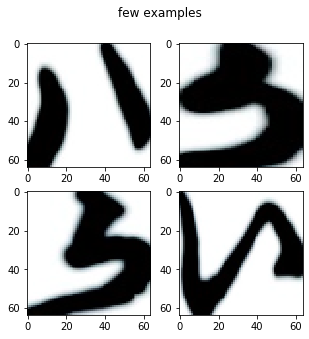

In [3]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('few examples')

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(X[0])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(X[1])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(X[2])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(X[3])

In [4]:
print(X.shape)
X_f = []
for i in range(len(X)):
    img = X[i]
    img = color.rgb2gray(img)
    X_f.append(img)
del X
X = np.array(X_f)
del X_f
print(X.shape)

(20000, 64, 64, 3)
(20000, 64, 64)


In [5]:
print(X.shape)
X = np.reshape(X, (X.shape[0], 64*64))
print(X.shape)

(20000, 64, 64)
(20000, 4096)


### Encoding the Dependent Variable

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:10])

[46 11 11  7 42 42 53 12 11 43]


In [7]:
print(len(np.unique(y)))
cat_num = len(np.unique(y))

539


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test = np.array(X_test)
y_test = np.array(y_test)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\nijao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

## Training the Random Forest Classification model on the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #61.5% f## Making the Confusion Matrixor Logistic reg with just 1000  
#random guesses will give 0.1855 %

[[ 11   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0   5 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0   1]
 [  0   0   1 ...   0   0 138]]


0.60525

# Creating a simple CNN

In [18]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation='relu', input_shape=[64, 64,1]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=1280, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=cat_num, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
cnn.fit(x = (X_train, y_train), validation_data = (X_test,y_test), epochs = 25)

W0115 23:29:20.517632 18720 ag_logging.py:146] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001FC2E788C18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: Layer sequential_4 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 4096) dtype=float32>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]